 This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

Student Performance Prediction using Machine Learning


Sample Data:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Processed Data:
    school  sex  age  address  famsize  Pstatus  Medu  Fed

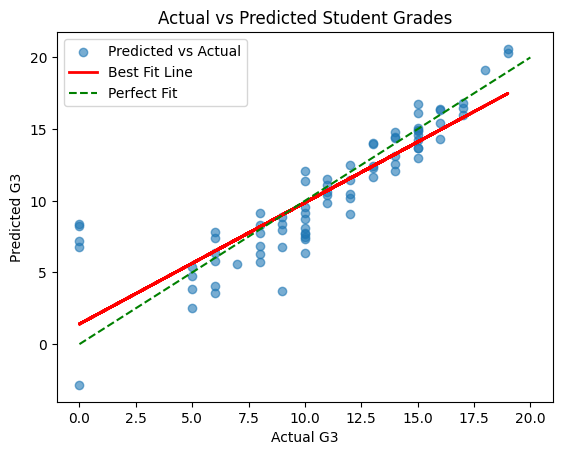

In [43]:
# 🎓 Student Performance Prediction using Machine Learning
# Author: <Lakshman Rithesh R>
# Description: Predicts students' final grades (G3) using Linear Regression.

# ==========================
# 1. Import Dependencies
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# ==========================
# 2. Load Dataset
# ==========================
df = pd.read_csv("student-mat.csv")
print("Sample Data:\n", df.head())

# ==========================
# 3. Data Preprocessing
# ==========================
le = LabelEncoder()

# Encode categorical variables
df['school'] = le.fit_transform(df["school"])
df['sex'] = le.fit_transform(df["sex"])
df['address'] = le.fit_transform(df["address"])
df['famsize'] = le.fit_transform(df["famsize"])
df['Pstatus'] = le.fit_transform(df["Pstatus"])

# One-hot encoding for parent jobs
M_job = pd.get_dummies(df["Mjob"], prefix="Mjob")
F_job = pd.get_dummies(df["Fjob"], prefix="Fjob")

# Encode other object type columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Merge new job features and drop original columns
df = pd.concat([df, M_job, F_job], axis=1)
df.drop(['Mjob', 'Fjob'], axis=1, inplace=True)

print("Processed Data:\n", df.head())

# ==========================
# 4. Feature Selection
# ==========================
X = df.drop(['G3'], axis=1)
y = df['G3']

feature_names = X.columns.tolist()
Selector = VarianceThreshold(threshold=0.1)
X_reduced = Selector.fit_transform(X)

# Find dropped features
dropped = [name for i, name in enumerate(feature_names) if i not in Selector.get_support(indices=True)]
print("Dropped features with low variance:", dropped)

# ==========================
# 5. Feature Scaling
# ==========================
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X_reduced)

# ==========================
# 6. Train-Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ==========================
# 7. Train Model
# ==========================
Model = LinearRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# ==========================
# 8. Evaluation
# ==========================
Error = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {Error:.2f}")
print(f"R² Score: {R2*100:.2f}%")

# ==========================
# 9. Visualization
# ==========================
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")

# Best fit regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red", linewidth=2, label="Best Fit Line")

# Perfect prediction line
plt.plot([0, 20], [0, 20], color="green", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Student Grades")
plt.legend()
plt.show()
